In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling

1. **Normalization**

In [ ]:
# Before
x = pd.Series([9,5,1,11]).astype(float)
x

,0
0,9.0
1,5.0
2,1.0
3,11.0


In [ ]:
# MinMaxScaler Equation
mi = x.min()
ma = x.max()
m = ma - mi

c = 0
for i in x:
  x[c] = (i - mi)/ m
  c+=1

# After
x

,0
0,0.8
1,0.4
2,0.0
3,1.0


2. **Standardization**

In [ ]:
# Before
x = pd.Series([9,5,1,11]).astype(float)
x

,0
0,9.0
1,5.0
2,1.0
3,11.0


In [ ]:
# StandardScaler
me = x.mean()
std = x.std()

c = 0
for i in x:
  x[c] = (i - me)/ std
  c += 1

# After
x

,0
0,0.563735
1,-0.338241
2,-1.240216
3,1.014722


# KNN

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [ ]:
zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in zero:
  mean = int(df[i].mean(skipna=True))
  df[i] = df[i].replace(0, np.nan)
  df[i] = df[i].replace(np.nan, mean)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.436589,0.471876,33.240885,0.348958
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.877335,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
q1 = df["BMI"].quantile(0.25)
q3 = df["BMI"].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
df = df[(df['BMI']>low)&(df['BMI']<high)]
df.reset_index(drop=True, inplace=True)
df.shape

(760, 9)

In [ ]:
x = df.drop(columns='Outcome')
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
minmax = MinMaxScaler()
standard = StandardScaler()

In [ ]:
x_scaled = minmax.fit_transform(x)
x_scaled

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.48427673, 0.2438916 ,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.26415094, 0.12127943,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.16037736, 0.26388272,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.25157233, 0.07418925,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.37421384, 0.12039094,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.3836478 , 0.10528654,
        0.03333333]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.6, random_state=3 )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc

0.7653508771929824

Standard Scale

In [ ]:
x_scaled = standard.fit_transform(x)
x_scaled

array([[ 0.63684885,  0.87138672, -0.01293859, ...,  0.21942288,
         0.48737386,  1.4165439 ],
       [-0.85056703, -1.20124101, -0.517212  , ..., -0.86727394,
        -0.3630886 , -0.19585512],
       [ 1.2318152 ,  2.02284657, -0.68530313, ..., -1.37957387,
         0.62603621, -0.11099201],
       ...,
       [ 0.33936568, -0.01688231, -0.01293859, ..., -0.9293709 ,
        -0.68971548, -0.28071822],
       [-0.85056703,  0.14761196, -1.0214854 , ..., -0.32392553,
        -0.36925137,  1.16195458],
       [-0.85056703, -0.93805018, -0.18102973, ..., -0.27735281,
        -0.47401848, -0.87475997]])

# KNN Whole Steps

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# step 1
x = df.drop(columns='Outcome')
y = df['Outcome']

# step 2
minmax = MinMaxScaler()
standard = StandardScaler()
knn = KNeighborsClassifier()

# step 3
x_scaled = minmax.fit_transform(x)
# or
# x_scaled = standard.fit_transform(x)

# step 4
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=3)

# step 5
knn.fit(x_train, y_train)

# step 6
y_pred = knn.predict(x_test)

# step 7
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7192982456140351

# SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
acc

0.7280701754385965

# Iris CSV

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()
df.duplicated().sum()
df = df.drop(columns=["Id"])
df.drop_duplicates(inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df["Species"].unique()
df["Species"] = df["Species"].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])
df.head()

<ipython-input-21-0b55a2d02637>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Species"] = df["Species"].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

minmax = MinMaxScaler()
knn = KNeighborsClassifier()
svc = SVC()

In [ ]:
x = df.drop(columns=["Species"])
y = df["Species"]

x_scaled = minmax.fit_transform(x)
x_scaled

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=3)

In [ ]:
# KNN
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

acc = accuracy_score(y_test,y_pred)
acc

0.9661016949152542

In [ ]:
# SVM
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
acc

0.9830508474576272

# Naive Bayes

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
x = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

minmax = MinMaxScaler()
gnb = GaussianNB()

In [ ]:
x_scaled = minmax.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=3)

gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)

acc = accuracy_score(y_test,y_pred)
acc

0.9210526315789473

In [ ]:
models = [KNeighborsClassifier(),SVC(),GaussianNB()]

for i in models:
  print(i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print(classification_report(y_test,y_pred))
  print()

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        80
           1       0.89      0.93      0.91       148

    accuracy                           0.88       228
   macro avg       0.88      0.86      0.87       228
weighted avg       0.88      0.88      0.88       228


SVC()
              precision    recall  f1-score   support

           0       0.93      0.78      0.84        80
           1       0.89      0.97      0.93       148

    accuracy                           0.90       228
   macro avg       0.91      0.87      0.88       228
weighted avg       0.90      0.90      0.90       228


GaussianNB()
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        80
           1       0.92      0.97      0.94       148

    accuracy                           0.92       228
   macro avg       0.92      0.90      0.91       228
weighted avg       0.92      0

# Imbalance Data Handling

In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
ros = RandomOverSampler()
smote = SMOTE()

In [ ]:
x = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [ ]:
# Random Over Sampler
x_res,y_res = ros.fit_resample(x,y)
print(x_res.duplicated().sum(),end="\n\n")
print(y_res.value_counts(),end="\n\n")

models = [KNeighborsClassifier(),SVC(),GaussianNB()]

for i in models:
  print(i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print(classification_report(y_test,y_pred))
  print()

145

diagnosis
0    357
1    357
Name: count, dtype: int64

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        80
           1       0.89      0.93      0.91       148

    accuracy                           0.88       228
   macro avg       0.88      0.86      0.87       228
weighted avg       0.88      0.88      0.88       228


SVC()
              precision    recall  f1-score   support

           0       0.93      0.78      0.84        80
           1       0.89      0.97      0.93       148

    accuracy                           0.90       228
   macro avg       0.91      0.87      0.88       228
weighted avg       0.90      0.90      0.90       228


GaussianNB()
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        80
           1       0.92      0.97      0.94       148

    accuracy                           0.92       228
   macro avg       0.92 

In [ ]:
# Synthetic Minority Oversampling Technique (SMOTE)
x_res,y_res = smote.fit_resample(x,y)
print(x_res.duplicated().sum(),end="\n\n")
print(y_res.value_counts(),end="\n\n")

models = [KNeighborsClassifier(),SVC(),GaussianNB()]

for i in models:
  print(i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print(classification_report(y_test,y_pred))
  print()

0

diagnosis
0    357
1    357
Name: count, dtype: int64

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        80
           1       0.89      0.93      0.91       148

    accuracy                           0.88       228
   macro avg       0.88      0.86      0.87       228
weighted avg       0.88      0.88      0.88       228


SVC()
              precision    recall  f1-score   support

           0       0.93      0.78      0.84        80
           1       0.89      0.97      0.93       148

    accuracy                           0.90       228
   macro avg       0.91      0.87      0.88       228
weighted avg       0.90      0.90      0.90       228


GaussianNB()
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        80
           1       0.92      0.97      0.94       148

    accuracy                           0.92       228
   macro avg       0.92   

# Encoding

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape
df.describe()
df = df.drop(columns=["id"])
df.isna().sum()
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


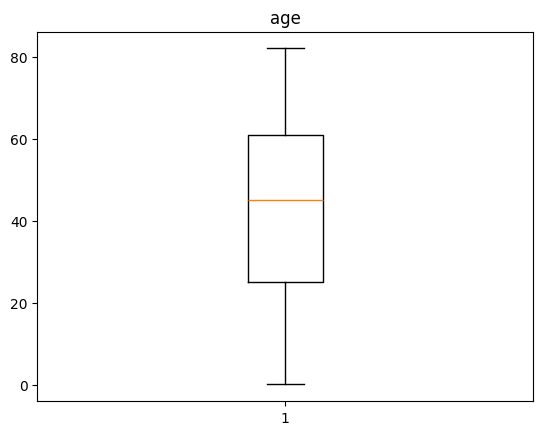

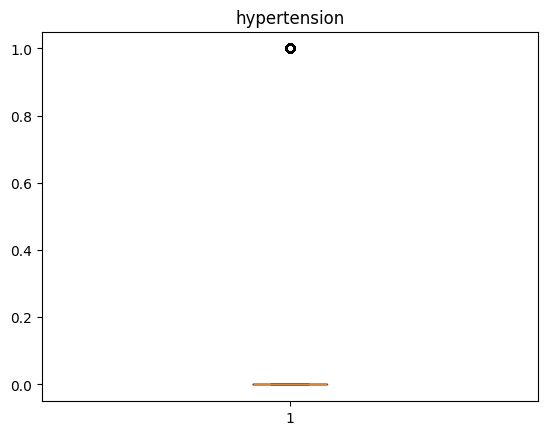

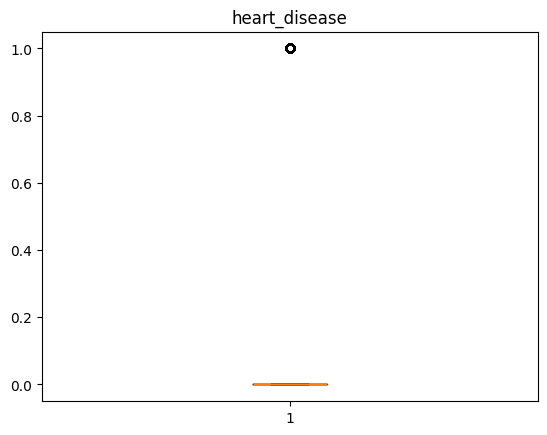

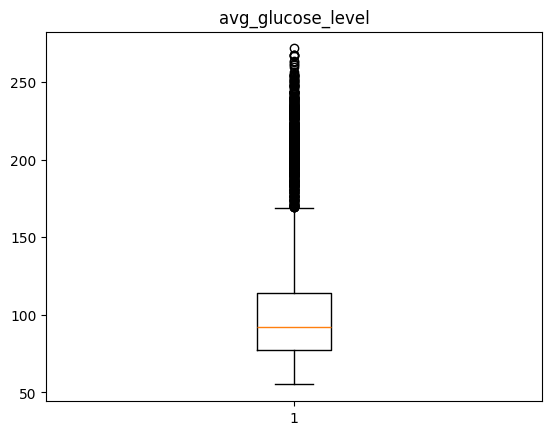

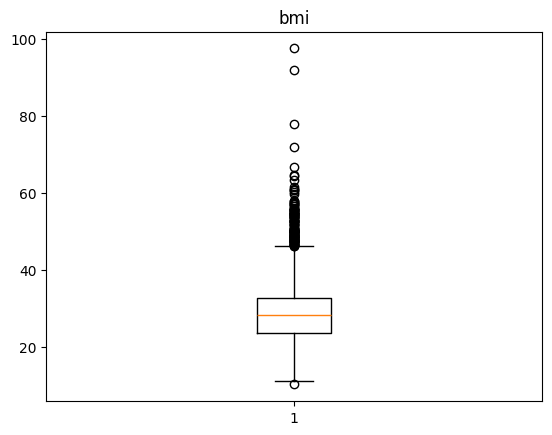

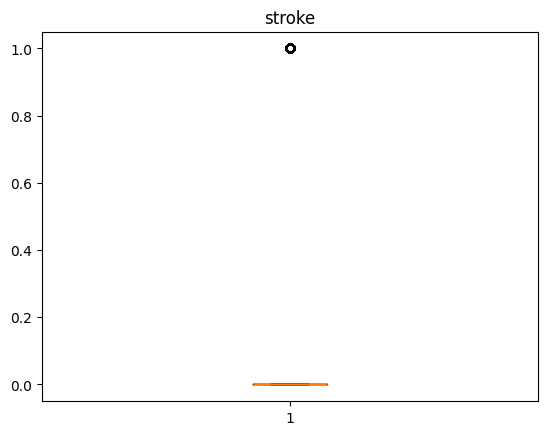

In [ ]:
for i in df:
  if df[i].dtype == "int" or df[i].dtype == "float":
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    print()

In [ ]:
# bmi needs outlier fix
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)
iqr = q3 - q1
high = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr
df = df[(df["bmi"]<high)&(df["bmi"]>low)]
df.reset_index(drop=True,inplace=True)
df.shape

(4984, 11)

In [ ]:
x = df.drop(columns=["stroke"])
y = df["stroke"]

In [ ]:
df = df[df["gender"]!="Other"]
df["gender"].value_counts()

,count
gender,
Female,2895
Male,2088


In [ ]:
ordinal = []
label = []
for i in df:
  if df[i].dtype == "object":
    if df[i].nunique() > 2:
      ordinal.append(i)
    else:
      label.append(i)

ordinal,label

# df["smoking_status"].value_counts()

(['work_type', 'smoking_status'], ['gender', 'ever_married', 'Residence_type'])

**Encoders**

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

ohe = OneHotEncoder()
le = LabelEncoder()
oe = OrdinalEncoder()

**Label Encoder**

In [ ]:
# le_gender = LabelEncoder()
# df["gender"] = le_gender.fit_transform(df["gender"])
# df["gender"]
# le_gender.transform(["Male"])
# le_gender.inverse_transform([0,1])

# le_married = LabelEncoder()
# df["ever_married"] = le_gender.fit_transform(df["ever_married"])
# df["ever_married"]
# le_gender.transform(["Yes"])
# le_gender.inverse_transform([0,1])

In [ ]:
dit = {}
for i in label:
  dit[i] = LabelEncoder()
  df[i] = dit[i].fit_transform(df[i])

df.head()

<ipython-input-44-6cb69c557266>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = dit[i].fit_transform(df[i])
<ipython-input-44-6cb69c557266>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = dit[i].fit_transform(df[i])
<ipython-input-44-6cb69c557266>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [ ]:
dit["gender"].transform(["Female","Male"])
dit["gender"].inverse_transform([0,1])

dit["ever_married"].transform(["No","Yes"])
dit["ever_married"].inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

**One Hot Encoder**

In [ ]:
df["work_type"].value_counts()
ohe = OneHotEncoder(drop="first", sparse_output = False)

res = ohe.fit_transform(df[["work_type"]])
cols = ohe.get_feature_names_out()

res = pd.DataFrame(res,columns=cols)

df_cpy = df.copy()
df.reset_index(drop=True,inplace=True)
df.drop(columns=["work_type"],inplace=True)

df = df.join(res)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,0.0,1.0,0.0,0.0
1,0,61.0,0,0,1,0,202.21,28.893237,never smoked,1,0.0,0.0,1.0,0.0
2,1,80.0,0,1,1,0,105.92,32.500000,never smoked,1,0.0,1.0,0.0,0.0
3,0,49.0,0,0,1,1,171.23,34.400000,smokes,1,0.0,1.0,0.0,0.0
4,0,79.0,1,0,1,0,174.12,24.000000,never smoked,1,0.0,0.0,1.0,0.0


In [ ]:
ohe.transform([["Private"]])
ohe.inverse_transform([[0., 1., 0., 0.]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([['Private']], dtype=object)

**Ordinal Encoder**

In [ ]:
# df["smoking_status"][(df["smoking_status"]=="Unknown")&(df["age"]<18)] = "never smoked"
# or
df.loc[(df["smoking_status"]=="Unknown")&(df["age"]<18),"smoking_status"] = "never smoked"

# df.loc[(df["smoking_status"]=="Unknown")&(df["age"]>=18),"smoking_status"] = "formerly smoked"
# or
df["smoking_status"] = df["smoking_status"].replace("Unknown","formerly smoked")

df["smoking_status"].value_counts()

,count
smoking_status,
never smoked,2516
formerly smoked,1696
smokes,771


In [ ]:
oe = OrdinalEncoder(categories=[["never smoked","formerly smoked","smokes"]])
df["smoking_status"] = oe.fit_transform(df[["smoking_status"]])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   4983 non-null   int64  
 1   age                      4983 non-null   float64
 2   hypertension             4983 non-null   int64  
 3   heart_disease            4983 non-null   int64  
 4   ever_married             4983 non-null   int64  
 5   Residence_type           4983 non-null   int64  
 6   avg_glucose_level        4983 non-null   float64
 7   bmi                      4983 non-null   float64
 8   smoking_status           4983 non-null   float64
 9   stroke                   4983 non-null   int64  
 10  work_type_Never_worked   4983 non-null   float64
 11  work_type_Private        4983 non-null   float64
 12  work_type_Self-employed  4983 non-null   float64
 13  work_type_children       4983 non-null   float64
dtypes: float64(8), int64(6)


# Data Imbalance Handling After Encoding

In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

smote = SMOTE()
ros = RandomOverSampler()

In [ ]:
x_res,y_res = ros.fit_resample(x,y)
y_res.value_counts()
y_res.duplicated().sum()

9474

In [ ]:
x = df.drop(columns=["stroke"])
y = df["stroke"]

In [ ]:
x_res,y_res = smote.fit_resample(x,y)
y_res.value_counts()
y_res.duplicated().sum()

9472

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
algms = [KNeighborsClassifier(),SVC(),BernoulliNB()]
for i in algms:
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print(i)
  print(classification_report(y_test,y_pred))
  print()

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1173
           1       0.85      0.98      0.91      1196

    accuracy                           0.91      2369
   macro avg       0.92      0.91      0.91      2369
weighted avg       0.92      0.91      0.91      2369


SVC()
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1173
           1       0.76      0.83      0.79      1196

    accuracy                           0.78      2369
   macro avg       0.78      0.78      0.78      2369
weighted avg       0.78      0.78      0.78      2369


BernoulliNB()
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1173
           1       0.72      0.78      0.75      1196

    accuracy                           0.74      2369
   macro avg       0.74      0.74      0.74      2369
weighted avg       0.74      

* KNN algorithm provides more accurate result for this model in comparison to others.



# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
df = pd.DataFrame([[2600,550000],[3000,565000],[3200,610000],[3600,680000],[4000,725000]],columns=["Area","Price"])
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


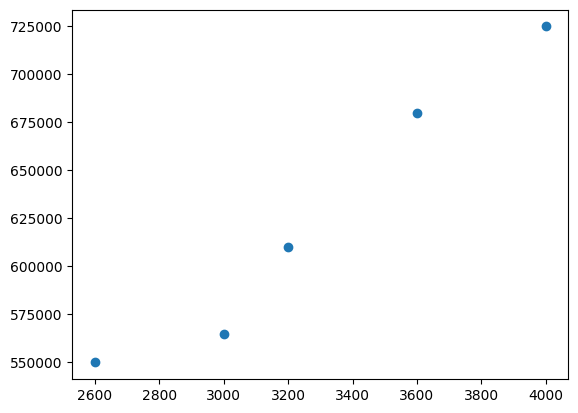

In [ ]:
plt.scatter(df["Area"],df["Price"])
plt.show()

In [ ]:
x = df[["Area"]]
y = df[["Price"]]
lr.fit(x,y)

LinearRegression()

In [ ]:
m = lr.coef_
c = lr.intercept_
m,c

(array([[135.78767123]]), array([180616.43835616]))

In [ ]:
# y = mx + c
x1 = 2500
y1 = m*x1+c

x2 = 4500
y2 = m*x2+c

y1,y2

(array([[520085.61643836]]), array([[791660.95890411]]))

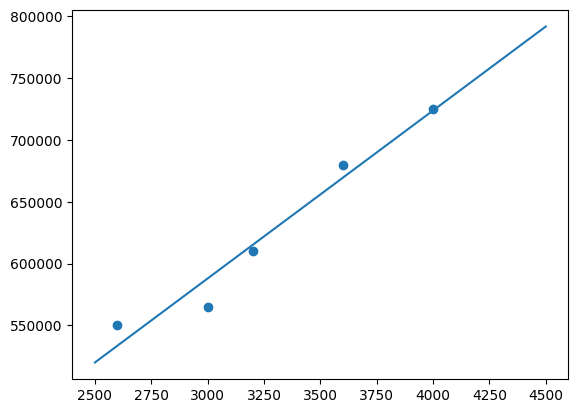

In [ ]:
plt.scatter(df["Area"],df["Price"])
plt.plot([x1,x2],[y1[0][0],y2[0][0]])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [ ]:
y_pred = lr.predict(x)
y_pred

array([[533664.38356164],
       [587979.45205479],
       [615136.98630137],
       [669452.05479452],
       [723767.12328767]])

In [ ]:
mean_absolute_error(y,y_pred)
root_mean_squared_error(y,y_pred)
r2_score(y,y_pred)
# or
checks = [mean_absolute_error,root_mean_squared_error,r2_score]
for i in checks:
  print(i)
  print(i(y,y_pred))

<function mean_absolute_error at 0x7992b6788900>
11246.57534246575
<function root_mean_squared_error at 0x7992b6788e00>
13668.030893042014
<function r2_score at 0x7992b67894e0>
0.9584301138199486


# House Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/kc_house_data.csv")
pd.set_option("display.max_columns",False)
# pd.set_option("display.max_rows",False)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()
df.info()
df["date"] = pd.to_datetime(df["date"])
df.drop(columns=["id","date"],inplace=True)
df.duplicated().sum()
df.isna().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


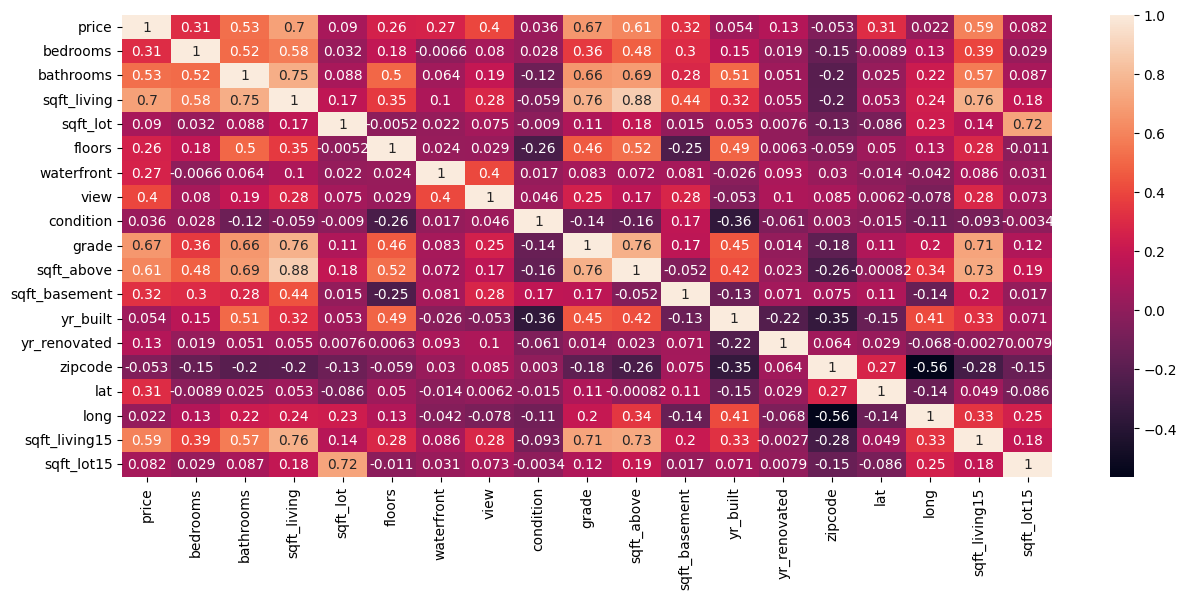

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
remove = ["sqft_lot","condition","sqft_above","sqft_basement","lat","long","sqft_living15","sqft_lot15"]
onehot = "zipcode"

df_old = df.copy()

df.drop(columns=remove,inplace=True)

df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,yr_built,yr_renovated,zipcode
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,7.656873,1971.005136,84.402258,98077.939805
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,1.175459,29.373411,401.679240,53.505026
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1900.000000,0.000000,98001.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,7.000000,1951.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,7.000000,1975.000000,0.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,8.000000,1997.000000,0.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,13.000000,2015.000000,2015.000000,98199.000000


In [ ]:
# df[df["price"]>4*10**6]
# df[df["bedrooms"]>8]
# df[df["bedrooms"]==0]
# df[df["bathrooms"]>7]
# df[df["bathrooms"]==0]
# df[df["sqft_living"]>8000]

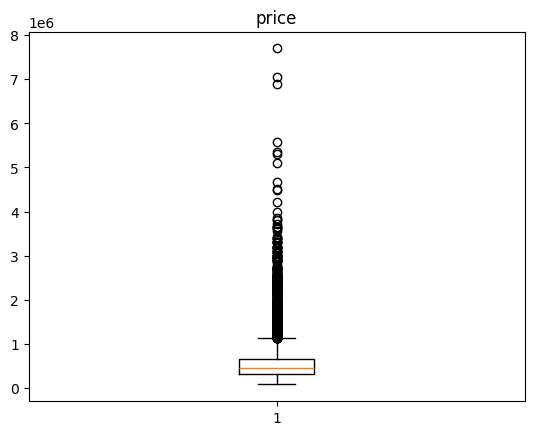

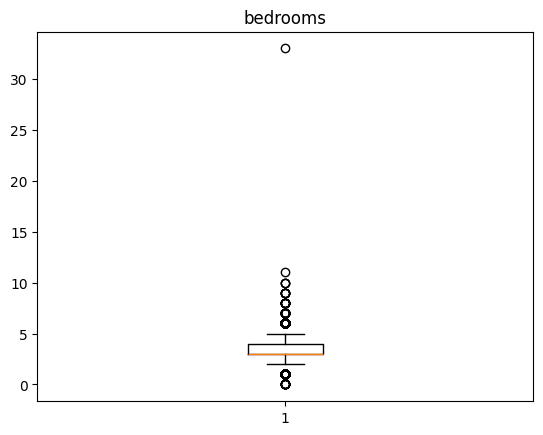

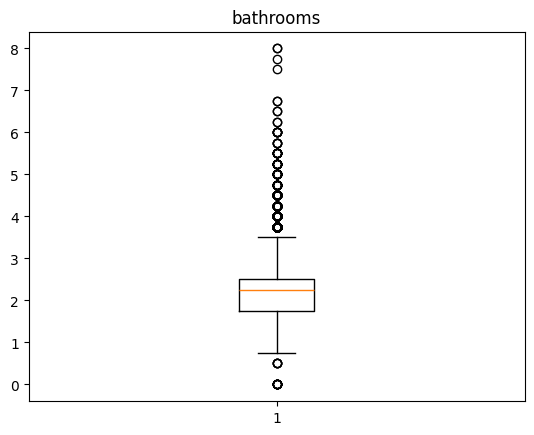

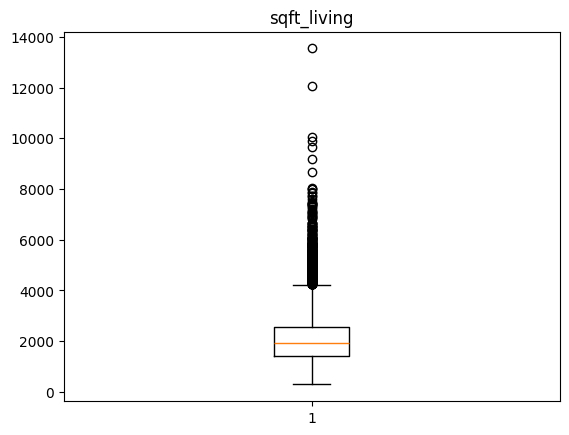

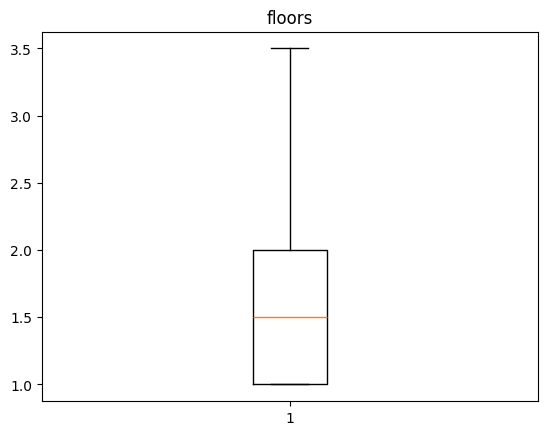

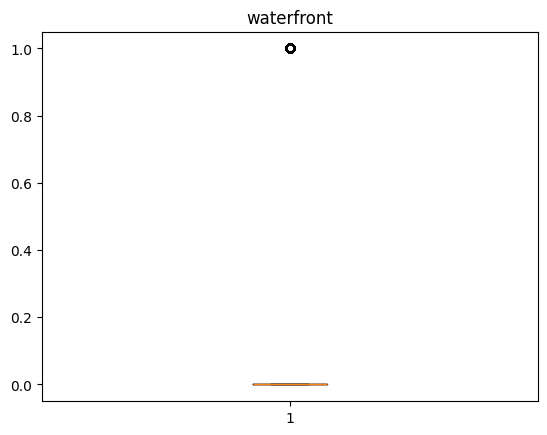

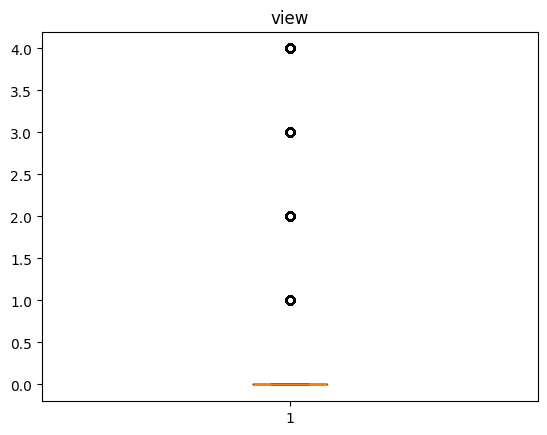

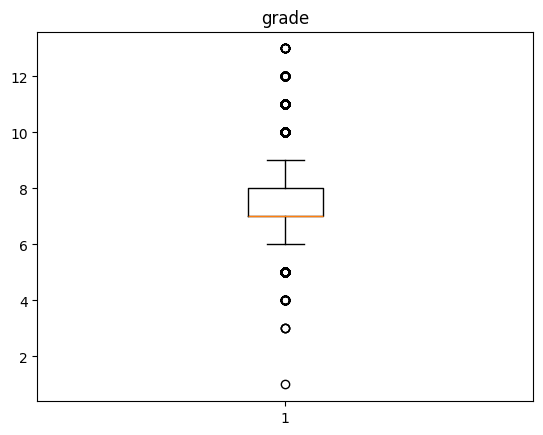

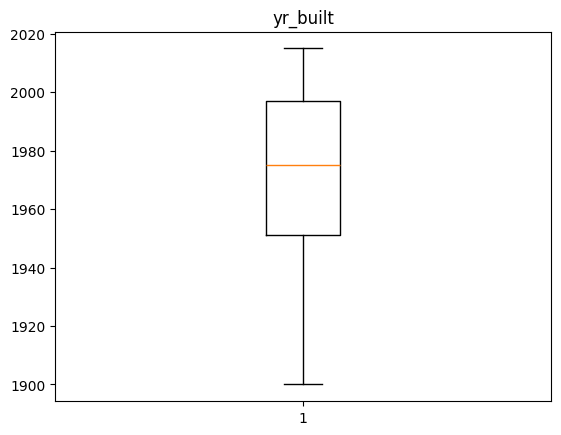

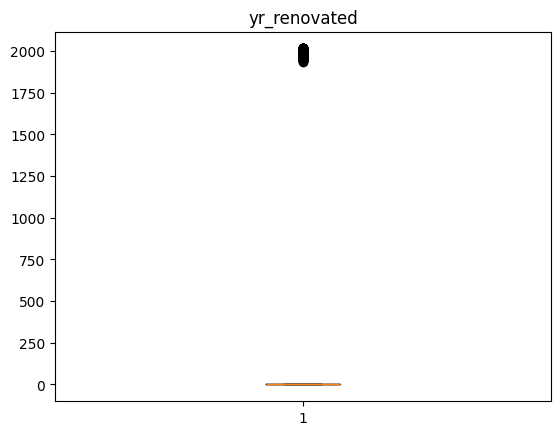

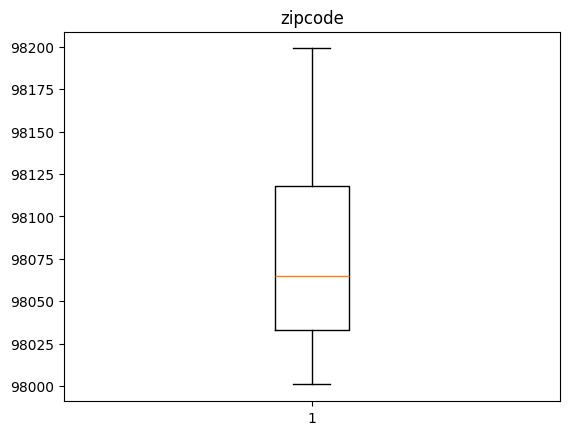

In [ ]:
for i in df:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()
  print()

In [ ]:
df = df[df["price"]<4*10**6]
df = df[df["bedrooms"]<=8]
df = df[df["bathrooms"]<7]
df = df[df["sqft_living"]<8000]

In [ ]:
def renovation(ren):
  if ren == 0:
    return 0
  else:
    return 1

df["yr_renovated"].apply(func=renovation)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,1.0,0,0,7,1955,0,98178
1,538000.0,3,2.25,2570,2.0,0,0,7,1951,1991,98125
2,180000.0,2,1.00,770,1.0,0,0,6,1933,0,98028
3,604000.0,4,3.00,1960,1.0,0,0,7,1965,0,98136
4,510000.0,3,2.00,1680,1.0,0,0,8,1987,0,98074


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first",sparse_output=False)

arr = ohe.fit_transform(df[["zipcode"]])
col = ohe.get_feature_names_out()
df_arr = pd.DataFrame(arr,columns=col)
df_arr.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(columns=["zipcode"],inplace=True)
df.reset_index(drop=True,inplace=True)
df = df.join(df_arr)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,yr_built,yr_renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,1.0,0,0,7,1955,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,2.0,0,0,7,1951,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,1.0,0,0,6,1933,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,1.0,0,0,7,1965,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1680,1.0,0,0,8,1987,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = df.drop(columns=["price"])
y = df["price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=3)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
m = lr.coef_
c = lr.intercept_

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
metrics = [mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score]

for i in metrics:
  print(i)
  print(i(y_test,y_pred))
  print()

<function mean_absolute_error at 0x7992b6788900>
93807.03272246975

<function mean_absolute_percentage_error at 0x7992b6788b80>
0.19339038694550734

<function mean_squared_error at 0x7992b6788cc0>
22998674989.835518

<function root_mean_squared_error at 0x7992b6788e00>
151653.14038896628

<function r2_score at 0x7992b67894e0>
0.8107671674529305



# Polynomial Regressioon

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
x_poly = poly.fit_transform(x)

from sklearn.model_selection import train_test_split
x_poly_train,x_poly_test,y_poly_train,y_poly_test = train_test_split(x_poly,y,test_size=0.4,random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_poly_train,y_poly_train)
y_poly_pred = lr.predict(x_poly_test)

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
metrics = [mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score]
for i in metrics:
  print(i)
  print(i(y_poly_test,y_poly_pred))
  print()

<function mean_absolute_error at 0x7992b6788900>
76382.26489053114

<function mean_absolute_percentage_error at 0x7992b6788b80>
0.15039994504343218

<function mean_squared_error at 0x7992b6788cc0>
15821152541.469582

<function root_mean_squared_error at 0x7992b6788e00>
125782.16304973286

<function r2_score at 0x7992b67894e0>
0.8630153664964548



# Decision Tree

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/Lung Cancer.csv")
pd.set_option("display.max_columns",False)

In [ ]:
df.drop_duplicates()
df.dropna()
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
df["GENDER"] = le_gender.fit_transform(df["GENDER"])
df["GENDER"].value_counts()

le_output = LabelEncoder()
df["LUNG_CANCER"] = le_gender.fit_transform(df["LUNG_CANCER"])
df["LUNG_CANCER"].value_counts()

,count
LUNG_CANCER,
1,1518
0,1482


In [ ]:
x = df.drop(columns=["LUNG_CANCER"])
y = df["LUNG_CANCER"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_scaled = mms.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtc.score(x_test,y_test)

0.49777777777777776

# Model Selection

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates()

zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in zero:
  mean = int(df[i].mean(skipna=True))
  df[i] = df[i].replace(0, np.nan)
  df[i] = df[i].replace(np.nan, mean)

df = df[df["Pregnancies"]<13]

df = df[df["SkinThickness"]<99]

df = df[(df['BMI']>15)&(df['BMI']<45)]

df.reset_index(drop=True, inplace=True)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,3.680614,120.898187,71.627615,25.815900,117.584379,31.548117,0.468960,32.966527,0.329149
std,3.089869,30.263682,11.742915,8.939406,92.336978,5.861837,0.325458,11.810255,0.470232
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.000000,79.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,22.000000,79.000000,31.600000,0.374000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,35.600000,0.624000,40.000000,1.000000
max,12.000000,199.000000,122.000000,54.000000,846.000000,44.600000,2.329000,81.000000,1.000000


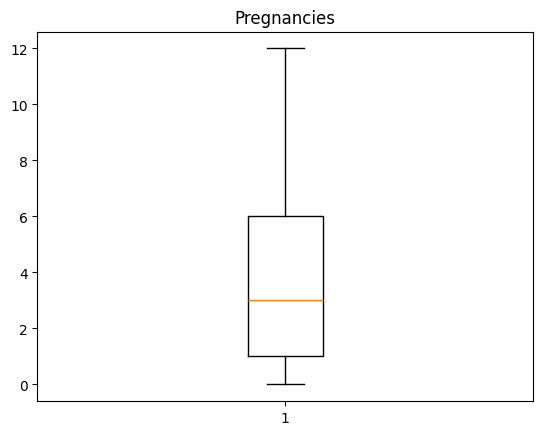

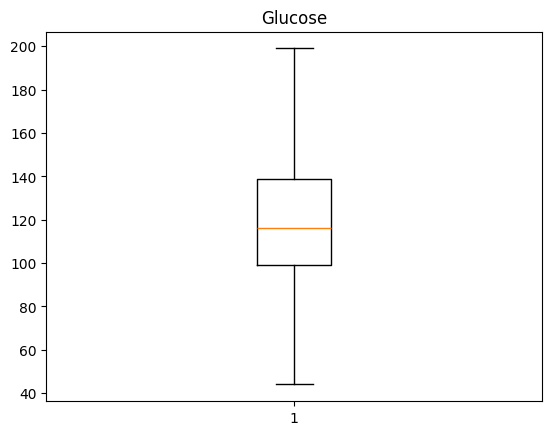

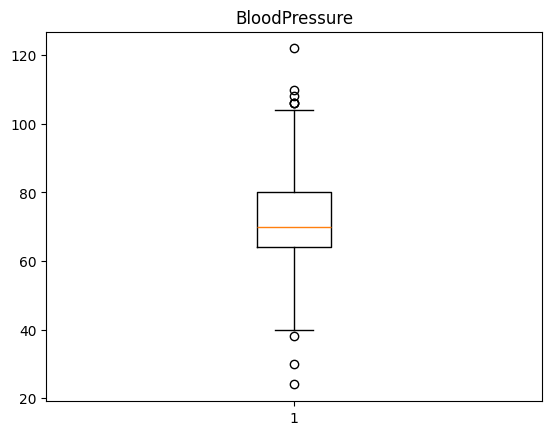

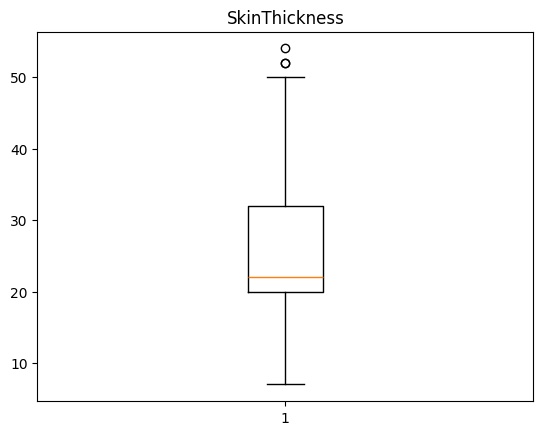

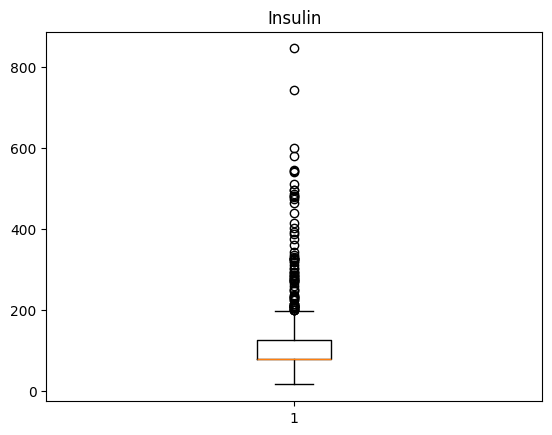

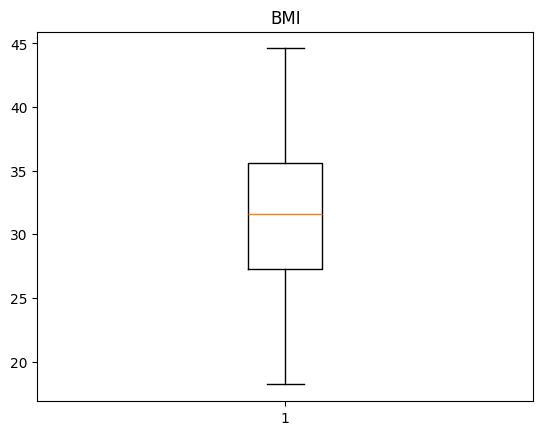

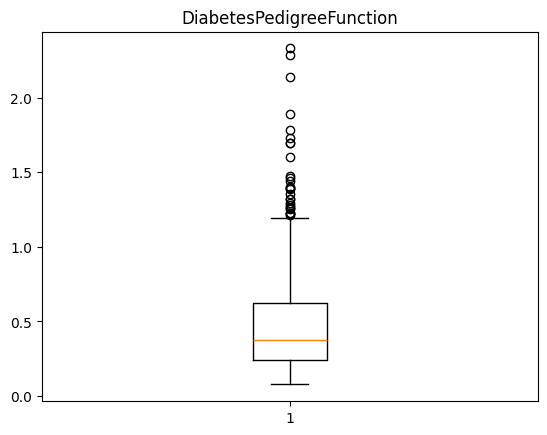

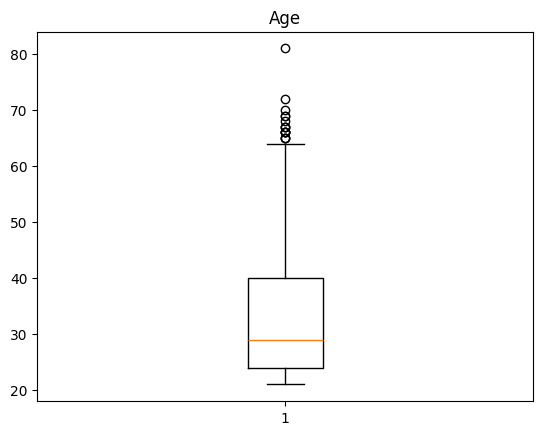

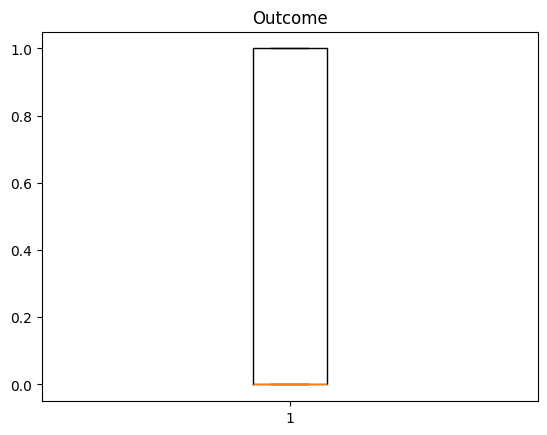

In [ ]:
for i in df:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()
  print()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

In [ ]:
x = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [ ]:
smote = SMOTE()
x_res,y_res = smote.fit_resample(x,y)

In [ ]:
mms = MinMaxScaler()
x_scaled = mms.fit_transform(x_res)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_res,test_size=0.4,random_state=2)

In [ ]:
models = [KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier()]

for i in models:
  print(i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print(classification_report(y_test,y_pred))
  print()

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       190
           1       0.76      0.85      0.81       195

    accuracy                           0.79       385
   macro avg       0.80      0.79      0.79       385
weighted avg       0.80      0.79      0.79       385


SVC()
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       190
           1       0.80      0.79      0.79       195

    accuracy                           0.79       385
   macro avg       0.79      0.79      0.79       385
weighted avg       0.79      0.79      0.79       385


GaussianNB()
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       190
           1       0.79      0.61      0.68       195

    accuracy                           0.72       385
   macro avg       0.73      0.72      0.71       385
weighted avg       0.73      0

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(),x_res,y_res,cv=5).mean()
cross_val_score(SVC(),x_res,y_res,cv=5,scoring="recall").mean()

for i in models:
  print(i)
  print(cross_val_score(i,x_res,y_res,cv=5).mean())
  print()


KNeighborsClassifier()
0.7661377374784111

SVC()
0.7172873488773748

GaussianNB()
0.7339162348877375

DecisionTreeClassifier()
0.7745574265975821



# GridSearchCV & RandomizedSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
params = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='accuracy')
grid_search.fit(x_res, y_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model: DecisionTreeClassifier(criterion='entropy')


# Params

Linear Regression

In [ ]:
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept or not
    'normalize': [True, False]  # Normalize input features
}

Logistic Regression

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'solver': ['liblinear', 'saga']  # Optimization solver
}

Decision Tree Classifier

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [3, 5, 10, None],  # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5]  # Minimum samples per leaf
}

Random Forest Classifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 10, None],  # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5],  # Minimum samples per leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

Support Vector Machine (SVM)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'degree': [2, 3, 4]  # Polynomial degree (for 'poly' kernel)
}

K-Nearest Neighbors (KNN)

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

Gradient Boosting Classifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 10],  # Maximum tree depth
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used for fitting
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split
}

XGBoost Classifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'max_depth': [3, 6, 9],  # Maximum depth of trees
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction for splitting
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features per tree
}

Multi-Layer Perceptron (MLP) - Neural Network

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Layer structure
    'activation': ['relu', 'tanh', 'logistic'],  # Activation function
    'solver': ['adam', 'sgd', 'lbfgs'],  # Optimization algorithm
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'learning_rate': ['constant', 'adaptive', 'invscaling']  # Learning rate schedule
}

K-Means Clustering

In [ ]:
param_grid = {
    'n_clusters': [2, 3, 5, 10],  # Number of clusters
    'init': ['k-means++', 'random'],  # Initialization method
    'n_init': [10, 20, 30],  # Number of initialization runs
    'max_iter': [100, 300, 500]  # Maximum iterations
}

# UnSupervised Learning

# K Means

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/data.csv")
df

,x,y
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014
3,489.140465,401.807159
4,446.207986,338.516682
...,...,...
331,638.916471,323.569097
332,542.005902,347.527070
333,611.964612,377.254978
334,520.654168,455.996453


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = ss.fit_transform(df)

In [ ]:
from sklearn.cluster import KMeans
km  = KMeans(n_clusters=3)
km.fit(df_scaled)

KMeans(n_clusters=3)

In [ ]:
km.inertia_

119.8749375999498

In [ ]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df["label"] = km.labels_
df

,x,y,label
0,516.012706,393.014514,1
1,436.211762,408.656585,1
2,512.052601,372.022014,1
3,489.140465,401.807159,1
4,446.207986,338.516682,1
...,...,...,...
331,638.916471,323.569097,2
332,542.005902,347.527070,1
333,611.964612,377.254978,0
334,520.654168,455.996453,1


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled,km.labels_)

0.6109562466674591

In [ ]:
n_cluster = range(1,45)
wcss = []

for i in n_cluster:
  km = KMeans(n_clusters=i)
  km.fit(df_scaled)
  wcss.append(km.inertia_)

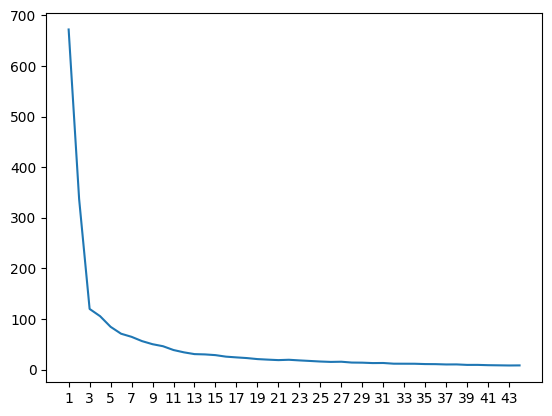

In [ ]:
plt.plot(n_cluster,wcss)
plt.xticks(range(1,45,2))
plt.show()

# Mall

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df_cut = df.drop(columns=["CustomerID","Annual Income (k$)"])

In [ ]:
df_cut

,Genre,Age,Spending Score (1-100)
0,Male,19,39
1,Male,21,81
2,Female,20,6
3,Female,23,77
4,Female,31,40
...,...,...,...
195,Female,35,79
196,Female,45,28
197,Male,32,74
198,Male,32,18


In [ ]:
df_cat = df_cut.copy()
df_cat["Age_Cat"] = pd.cut(df_cat["Age"],bins=[0,30,55,100],labels=["Adult","Middle Aged","Senior"])
df_cat["Spend_Cat"] = pd.cut(df_cat["Spending Score (1-100)"],bins=[0,40,70,100],labels=["Low Spend","Average Spend","High Spend"])
df_new = df_cat.copy()
df_cat.drop(columns=["Age","Spending Score (1-100)"],inplace=True)

In [ ]:
df_cat.isna().sum()

,0
Genre,0
Age_Cat,0
Spend_Cat,0


In [ ]:
df_num = df_cat.copy()

In [ ]:
df_num

,Genre,Age_Cat,Spend_Cat
0,Male,Adult,Low Spend
1,Male,Adult,High Spend
2,Female,Adult,Low Spend
3,Female,Adult,High Spend
4,Female,Middle Aged,Low Spend
...,...,...,...
195,Female,Middle Aged,High Spend
196,Female,Middle Aged,Low Spend
197,Male,Middle Aged,High Spend
198,Male,Middle Aged,Low Spend


In [ ]:
from sklearn.preprocessing import LabelEncoder
genre_le = LabelEncoder()
df_num["Genre"] = genre_le.fit_transform(df_num["Genre"])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder(categories=[["Adult","Middle Aged","Senior"],["Low Spend","Average Spend","High Spend"]])
df_num[["Age_Cat","Spend_Cat"]] = ord.fit_transform(df_num[["Age_Cat","Spend_Cat"]])

In [ ]:
df_num = df_num.astype("int")
df_num

,Genre,Age_Cat,Spend_Cat
0,1,0,0
1,1,0,2
2,0,0,0
3,0,0,2
4,0,1,0
...,...,...,...
195,0,1,2
196,0,1,0
197,1,1,2
198,1,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df_num)

In [ ]:
from sklearn.cluster import KMeans

n_clusters = range(1,15)
wcss = []

for i in n_clusters:
  km = KMeans(n_clusters=i,random_state=3)
  km.fit(x_scaled)
  wcss.append(km.inertia_)

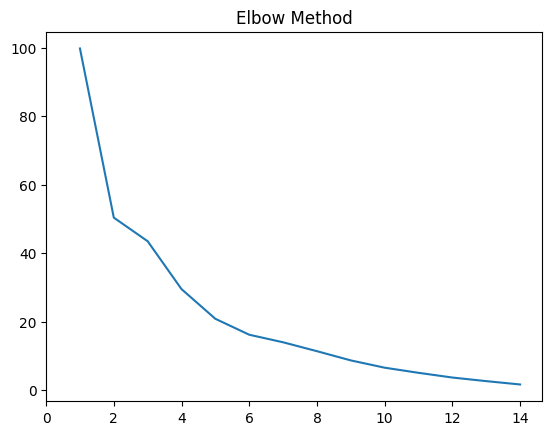

In [ ]:
plt.plot(n_clusters,wcss)
plt.title("Elbow Method")
plt.xticks(range(0,15,2))
plt.show()

In [ ]:
km = KMeans(n_clusters=8,random_state=3)
km.fit(x_scaled)

KMeans(random_state=3)

In [ ]:
km.inertia_

11.35871200429198

In [ ]:
df_new["Clusters"] = km.labels_

In [ ]:
df_new

,Genre,Age,Spending Score (1-100),Age_Cat,Spend_Cat,Clusters
0,Male,19,39,Adult,Low Spend,2
1,Male,21,81,Adult,High Spend,4
2,Female,20,6,Adult,Low Spend,1
3,Female,23,77,Adult,High Spend,7
4,Female,31,40,Middle Aged,Low Spend,6
...,...,...,...,...,...,...
195,Female,35,79,Middle Aged,High Spend,3
196,Female,45,28,Middle Aged,Low Spend,6
197,Male,32,74,Middle Aged,High Spend,5
198,Male,32,18,Middle Aged,Low Spend,2


In [ ]:
df_new[df_new["Clusters"]==0]

,Genre,Age,Spending Score (1-100),Age_Cat,Spend_Cat,Clusters
53,Male,59,60,Senior,Average Spend,0
57,Male,69,46,Senior,Average Spend,0
60,Male,70,56,Senior,Average Spend,0
64,Male,63,51,Senior,Average Spend,0
70,Male,70,55,Senior,Average Spend,0
74,Male,59,47,Senior,Average Spend,0
80,Male,57,51,Senior,Average Spend,0
82,Male,67,41,Senior,Average Spend,0
102,Male,67,59,Senior,Average Spend,0
108,Male,68,43,Senior,Average Spend,0


In [ ]:
df_new[df_new["Clusters"]==1]
# df_new["Clusters"].replace(1,"")
# df_new["Spend_Cat"][df_new["Clusters"]==1].value_counts().index[0]

,Genre,Age,Spending Score (1-100),Age_Cat,Spend_Cat,Clusters
2,Female,20,6,Adult,Low Spend,1
45,Female,24,65,Adult,Average Spend,1
47,Female,27,47,Adult,Average Spend,1
48,Female,29,42,Adult,Average Spend,1
58,Female,27,51,Adult,Average Spend,1
78,Female,23,52,Adult,Average Spend,1
84,Female,21,57,Adult,Average Spend,1
87,Female,22,55,Adult,Average Spend,1
97,Female,27,50,Adult,Average Spend,1
100,Female,23,41,Adult,Average Spend,1


In [ ]:
df_new[df_new["Clusters"]==2]

,Genre,Age,Spending Score (1-100),Age_Cat,Spend_Cat,Clusters
0,Male,19,39,Adult,Low Spend,2
8,Male,64,3,Senior,Low Spend,2
10,Male,67,14,Senior,Low Spend,2
14,Male,37,13,Middle Aged,Low Spend,2
18,Male,52,29,Middle Aged,Low Spend,2
20,Male,35,35,Middle Aged,Low Spend,2
30,Male,60,4,Senior,Low Spend,2
32,Male,53,4,Middle Aged,Low Spend,2
42,Male,48,36,Middle Aged,Low Spend,2
126,Male,43,35,Middle Aged,Low Spend,2


In [ ]:
def cluster(val):
  return df_new["Age_Cat"][df_new["Clusters"]==val].value_counts().index[0] +" "+ df_new["Genre"][df_new["Clusters"]==val].value_counts().index[0] +" with "+ df_new["Spend_Cat"][df_new["Clusters"]==val].value_counts().index[0]
df_new["Customer_Category"] = df_new["Clusters"].apply(cluster)

In [ ]:
df_new

,Genre,Age,Spending Score (1-100),Age_Cat,Spend_Cat,Clusters,Customer_Category
0,Male,19,39,Adult,Low Spend,2,Middle Aged Male with Low Spend
1,Male,21,81,Adult,High Spend,4,Adult Male with Average Spend
2,Female,20,6,Adult,Low Spend,1,Adult Female with Average Spend
3,Female,23,77,Adult,High Spend,7,Adult Female with High Spend
4,Female,31,40,Middle Aged,Low Spend,6,Middle Aged Female with Low Spend
...,...,...,...,...,...,...,...
195,Female,35,79,Middle Aged,High Spend,3,Middle Aged Female with Average Spend
196,Female,45,28,Middle Aged,Low Spend,6,Middle Aged Female with Low Spend
197,Male,32,74,Middle Aged,High Spend,5,Middle Aged Male with Average Spend
198,Male,32,18,Middle Aged,Low Spend,2,Middle Aged Male with Low Spend


In [ ]:
df_new["Customer_Category"].value_counts()

,count
Customer_Category,
Middle Aged Female with Average Spend,48
Middle Aged Female with Low Spend,30
Middle Aged Male with Low Spend,29
Middle Aged Male with Average Spend,24
Adult Male with Average Spend,23
Adult Female with Average Spend,17
Adult Female with High Spend,17
Senior Male with Average Spend,12


In [ ]:
df["Customer_Category"] = df_new["Clusters"].apply(cluster)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Customer_Category
0,1,Male,19,15,39,Middle Aged Male with Low Spend
1,2,Male,21,15,81,Adult Male with Average Spend
2,3,Female,20,16,6,Adult Female with Average Spend
3,4,Female,23,16,77,Adult Female with High Spend
4,5,Female,31,17,40,Middle Aged Female with Low Spend
...,...,...,...,...,...,...
195,196,Female,35,120,79,Middle Aged Female with Average Spend
196,197,Female,45,126,28,Middle Aged Female with Low Spend
197,198,Male,32,126,74,Middle Aged Male with Average Spend
198,199,Male,32,137,18,Middle Aged Male with Low Spend


In [ ]:
df.to_csv("Mall_Customers_Labelled.csv",index=False)

# Heirarchical Clustering